In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import torch
import torchaudio
import numpy as np
# from core import utils
# from hum_to_find.core.preprocess_data import *
# from hum_to_find.core.constants import *

In [3]:
hum_path = '/home/huynhhao/Desktop/hum/data/train/hum'
song_path = '/home/huynhhao/Desktop/hum/data/train/song'
hum_filenames = os.listdir(hum_path)[1:]
song_filenames = os.listdir(song_path)[1:]

hum_filepaths = [os.path.join(hum_path, x) for x in hum_filenames]
song_filepaths = [os.path.join(song_path, x) for x in song_filenames]

### Qestion: Does all the song and hum are matched in the train data? how many hum longer that 11 secs? how many songs longer than 11 secs?


Sample Rate: 16000
Shape: (1, 143424)
Dtype: torch.float32
 - Max:      0.460
 - Min:     -0.416
 - Mean:     0.000
 - Std Dev:  0.118
 - Length: 8.964

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1231, 0.1406, 0.1448]])



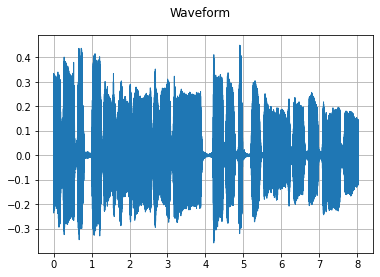

In [25]:
wave, rate = torchaudio.load(hum_filepaths[100])
utils.print_stats(wave, rate)
utils.plot_waveform(wave[:, 15000:], rate)

In [22]:
wave[:, 200:]

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1231, 0.1406, 0.1448]])

Sample Rate: 44100
Shape: (2, 516096)
Dtype: torch.float32
 - Max:      1.000
 - Min:     -1.000
 - Mean:    -0.009
 - Std Dev:  0.310
 - Length: 11.702857142857143

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0841, -0.1037, -0.1046],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0588,  0.0358,  0.1163]])



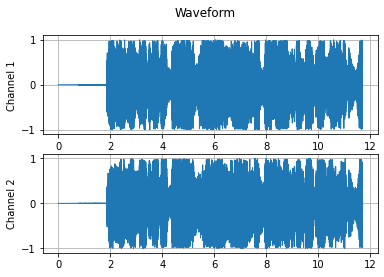

In [5]:
wave, rate = torchaudio.load(song_filepaths[100])
utils.print_stats(wave, rate)
utils.plot_waveform(wave, rate)

In [6]:
song_filepaths[100]

'/home/huynhhao/Desktop/hum/data/train/song/0627.mp3'

In [7]:
hum_filepaths[100]

'/home/huynhhao/Desktop/hum/data/train/hum/0627.mp3'

In [34]:
for value in wave[0, :]:
    if value.item() > 0.1:
        print(value.item())
        break

0.11325865983963013


In [90]:
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=1024,
    hop_length=512,
    n_mels=96
)
device = 'cpu'

hds = HumDataset(TRAIN_ANNOTATIONS_FILE, AUDIO_DIR, mel_spectrogram, SAMPLE_RATE, NUM_SAMPLES, SINGING_THRESHOLD, device )

In [113]:
sampler = torch.utils.data.RandomSampler(hds)
dataloader = torch.utils.data.DataLoader(hds, batch_size = 16, sampler = sampler)


In [102]:
inputs = None
targets = None
for input, target in dataloader:
    inputs = input
    targets = target
    break    

In [107]:
len(inputs)

2

In [117]:
type(inputs[0])

list

In [119]:
len(input[1])

9

In [121]:
len(inputs[0][0])

16

In [126]:
meta = pd.read_csv('/home/huynhhao/Desktop/hum/hum_to_find/meta_data/train_meta.csv')

In [128]:
all_id = meta.loc[:, 'music_id'].values

In [132]:
all_distances = np.expand_dims(all_id, 0) - np.expand_dims(all_id, 1)

In [135]:
all_distances = np.abs(all_distances)
np.fill_diagonal(all_distances, 1000000)

In [139]:
all_distances[all_distances == 0] = 10000000

In [14]:
x = torch.tensor([[1, 2]])
y = torch.tensor([[2, 4]])
z = [x, y]
z

[tensor([[1, 2]]), tensor([[2, 4]])]

In [4]:
1000//100

10

In [5]:
signal = torch.randn(1, 180000)
overlapping = 16000

num_chunks = (signal.shape[-1]//overlapping) - 1
all_chunks = []
for i in range(num_chunks):
    all_chunks.append(signal[:, i*overlapping:(i+2)*overlapping])

In [6]:
len(all_chunks)

10

In [9]:
all_chunks[0][:, 16000:]

tensor([[-0.3853, -1.2574,  1.5602,  ...,  0.7657, -0.3666, -0.3800]])

In [10]:
all_chunks[1][:, :]

tensor([[-0.3853, -1.2574,  1.5602,  ..., -0.0481,  0.9564,  0.1379]])

In [13]:
import json
data_path = '/home/huynhhao/Desktop/hum/data/cached_embeddings/val_hummed_audio_embeddings.jl'
embeddings_data = []
with open(data_path, 'r') as f:
    for line in f:
        embeddings_data.append(json.loads(line))

In [16]:
len(embeddings_data[0]['embeddings'])

10

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
def knn_retriever( ) -> None:
    """Use KNN to find the K nearest neighbors to the query embeddings
    """
    # construct a dataframe of song_id and embeddings to train knn classifier
    print('KNN Retriever is working')
    database_df = pd.DataFrame([], columns = ['id', 'embedding'])
    for song in all_song_embeddings:
        id = song['id']
        for embedding in song['embeddings']:
            row = {'id': id, 'embedding': embedding}
            database_df = database_df.append(row, ignore_index=True)
    

        